In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')

In [9]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [14]:
df_budgets = df_budgets.applymap(lambda x: str(x).replace('$', ''))

In [22]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: str(x).replace(',', '_'))



In [26]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)

In [27]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [30]:
df_budgets['worldwide_roi'] = (df_budgets['worldwide_gross'] / df_budgets['production_budget']) *100

In [31]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636


In [32]:
df_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,16458.272727


In [33]:
df_budgets['worldwide_roi'].describe()

count      5782.000000
mean        480.016137
std        2953.028231
min           0.000000
25%          49.229560
50%         170.830983
75%         375.834608
max      180000.000000
Name: worldwide_roi, dtype: float64

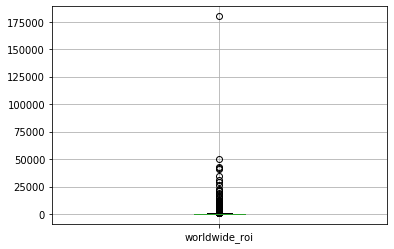

In [35]:
df_budgets.boxplot('worldwide_roi')

In [44]:
df_budgets.sort_values('worldwide_roi', ascending=False, inplace=True)

In [45]:
df_budgets2 = df_budgets.copy()

In [49]:
df_budgets2.drop(5745, axis=0, inplace=True)

In [50]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [52]:
df_budgets2.reset_index(inplace=True)

In [53]:
df_budgets2.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
1,5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
2,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
3,5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
4,5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [54]:
df_budgets2.drop('index', axis=1, inplace=True)

In [55]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
1,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
3,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
4,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [56]:
df_budgets2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 7 columns):
id                   5781 non-null object
release_date         5781 non-null object
movie                5781 non-null object
production_budget    5781 non-null int64
domestic_gross       5781 non-null int64
worldwide_gross      5781 non-null int64
worldwide_roi        5781 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 316.2+ KB


In [58]:
df_budgets2['worldwide_roi'].describe()

count     5781.000000
mean       448.962688
std       1773.482722
min          0.000000
25%         49.208840
50%        170.763234
75%        375.568161
max      49875.000000
Name: worldwide_roi, dtype: float64

In [59]:
names = ['low', 'somewhat low', 'moderate', 'somewhat high', 'high']
bins = [0, 49.208840, 170.763234, 375.568161, 49875.000000]

In [60]:
pd.qcut(df_budgets2['worldwide_roi'], 5, labels=names)

0       high
1       high
2       high
3       high
4       high
5       high
6       high
7       high
8       high
9       high
10      high
11      high
12      high
13      high
14      high
15      high
16      high
17      high
18      high
19      high
20      high
21      high
22      high
23      high
24      high
25      high
26      high
27      high
28      high
29      high
        ... 
5751     low
5752     low
5753     low
5754     low
5755     low
5756     low
5757     low
5758     low
5759     low
5760     low
5761     low
5762     low
5763     low
5764     low
5765     low
5766     low
5767     low
5768     low
5769     low
5770     low
5771     low
5772     low
5773     low
5774     low
5775     low
5776     low
5777     low
5778     low
5779     low
5780     low
Name: worldwide_roi, Length: 5781, dtype: category
Categories (5, object): [low < somewhat low < moderate < somewhat high < high]

In [61]:
df_budgets2['roi_category'] = pd.qcut(df_budgets2['worldwide_roi'], 5, labels=names)

In [62]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category
0,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000,high
1,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333,high
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high
3,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333,high
4,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462,high
